<a href="https://colab.research.google.com/github/HiroTakeda/Notes/blob/main/Note04_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generative Adversarial Network

- Related topics: __Regression__, __Logistic Regression__, __Neural Network__

Generative Adversarial Network (GAN) was presented by Goodfellow *et al.* at NIPS in 2014 [[paper](https://papers.nips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf)]. Since then, many variants of GAN were proposed and applied to a variety of different problems, for example [SR-GAN](https://arxiv.org/abs/1609.04802v5), [CycleGAN](https://arxiv.org/abs/1703.10593), [Domain Adaptation](https://arxiv.org/abs/1409.7495), and a lot more. This short note briefly explains GAN.

The objective of GAN may be stated as:

> Given a set of samples $\mathbf{x}_n$ drawn from a probability distribution $p$, find a generative model $G$ that draws a new sample $\mathbf{x}$ from the same probability distribution $p$.

A simple solution would be to model the probability distribution with a Gaussian distribution function. The mean and the variance are the unknown, and they can be estimated using the given samples. Once we have them, it is possible to draw a new sample using "randn( )", a numpy's built-in function, for example. In case $p$ is more complicated, the mixtures of Gaussians would be a better choice. But what if $p$ is even more complicated? In addition, what if $\mathbf{x}$ is not a scalar value or a small-sized vector but an image or a 3D shape? Goodfellow *et al.* proposed the GAN method that works for any $p$ and any $\mathbf{x}$. All we need is to prepare a set of samples.

The block diagram of GAN is often depicted as shown below,

![picture](https://drive.google.com/uc?id=1bNpdY0a77lDbFlCLHIj_N-7fxd2Qj0HG)

and, according to the paper, the following minmax optimization would provide the generator function $G$ of interest:

$$
\displaystyle{\min_{G}} \, \displaystyle{\max_{D}} \, E_{\mathbf{x}\sim p_{\mathrm{data}}} [\ln D(\mathbf{x})] + E_{\mathbf{x}\sim p_{\mathbf{z}}} [\ln (1 - D(G(\mathbf{z})))]
$$

At sight, it is probably hard to understand why the minmax optimization yields $G$ of interest. The following explains how it works step by step.


### Definitions


---


$\mathbf{z}$

A latent vector that is fed to the generator function $G(\cdot)$ to generate a new sample. The normally distributed random number generator is usually used.


---


$G(\mathbf{z})$

A new sample created by the generator function G from the given vector $\mathbf{z}$. It is treated as a __fake__ sample.


---


$\mathbf{x}$

The given samples drawn from a probablity distribution function $p(\mathbf{x}\,|\,\mathrm{real})$. They are treated as __real__ samples.


---


$D$

A separated neural network model which classifies the input sample is either __fake__ or __real__.


---



### Discriminator

Let's first look at the maximization part of the minmax optimization with respect to the descriminator $D$. $D$ is nothing but a binary classifier, that outputs 0 for fake samples and 1 for real samples. Therefore, we can find $D$ simply by the __logistic regression__ method. The desired $D$ rates the probability that a sample $\mathbf{x}$ is real between 0 and 1 (0 for fake and 1 for real):

$$
\begin{eqnarray}
p(\mathrm{real}\, |\, \mathbf{x}) &=& D(\mathbf{x}), \nonumber \\
p(\mathrm{fake}\, |\, \mathbf{x}) &=& 1 - D(\mathbf{x}), \nonumber
\end{eqnarray}
$$

where $p(\mathrm{real}\, |\, \mathbf{x})$ and $p(\mathrm{fake}\, |\, \mathbf{x})$ are known as *posterior probability*.

Given a set of samples $\mathbf{x}_n$ with a label $t_n$ that is 0 for fake and 1 for real, we have the likelihood function as

$$
L = \displaystyle\prod_{n} p(\mathrm{real}\, |\, \mathbf{x}_n)^{t_n} p(\mathrm{fake}\, |\, \mathbf{x}_n)^{(1 - t_n)} = \displaystyle\prod_{n} D(\mathbf{x}_n)^{t_n} (1 - D(\mathbf{x}_n))^{(1 - t_n)}.
$$

Taking the logarithm of both sides for convenience (it will yield the same solution because the logarithm is a monotonically increasing function), we have

$$
\ln L = \ln \displaystyle\prod_{n} D(\mathbf{x}_n)^{t_n} (1 - D(\mathbf{x}_n))^{(1 - t_n)} = \displaystyle\sum_{n} t_n \ln D(\mathbf{x}_n) + \displaystyle\sum_{n} (1 - t_n) \ln (1 - D(\mathbf{x}_n)),
$$

which is equivalent to

$$
\ln L \equiv E[t \ln D(\mathbf{x})] + E[(1-t) \ln (1-D(\mathbf{x}))].
$$

By maximizing the log likelihood function, we can find $D$:

$$
\displaystyle\max_{D} E[t \ln D(\mathbf{x})] + E[(1-t) \ln (1-D(\mathbf{x}))].
$$

Because the first term is computed only with the real samples ($\mathbf{x}\sim p(\mathbf{x} \, | \, \mathrm{real})$ and $t=1$):

$$
E[t \ln D(\mathbf{x})] \Rightarrow E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{real})} [\ln D(\mathbf{x})].
$$

Similarly the second term becomes

$$
E[(1-t)\ln (1 - D(\mathbf{x}))] \Rightarrow E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} [\ln (1 - D(\mathbf{x}))] \Rightarrow E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} [\ln (1 - D(G(\mathbf{z})))],
$$

where we use $\mathbf{x}=G(\mathbf{z})$ because we generate fake samples by the generator function. Hence we have the maximum likelihood estimator for D as

$$
\color{red}{\displaystyle\max_{D} E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{real})} [\ln D(\mathbf{x})] + E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} [\ln (1 - D(G(\mathbf{z})))],}
$$

that is the maximization part of the minmax optimization.


### Generator

The minimization part of the minmax optimization is straightforward. We want the generator's output to be so real that the discriminator unwillingly classified as real or 1. Hence the maximization

$$
\displaystyle\max_{G} E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln D(G(\mathbf{z}))]
$$

will yield the desired generator. That is equivalent to

$$
\displaystyle\max_{G} E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln D(G(\mathbf{z}))] \Rightarrow \color{red}{\displaystyle\min_{G} E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln (1 - D(G(\mathbf{z})))].}
$$

Let's see if the minimization yields us the generator that draws a new sample from the desired probability distribution $p(\mathbf{x} \, | \, \mathrm{real})$. We can rewrite the cost function as follows:

$$
\begin{eqnarray}
E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln (1 - D(G(\mathbf{z})))] &=& E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln (1 - D(\mathbf{x}))] \nonumber \\
&=& E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln p(\mathrm{fake}\, |\, \mathbf{x})]. \nonumber
\end{eqnarray}
$$

Using the Bayes theorem we have

$$
p(\mathrm{fake} \, | \, \mathbf{x}) = \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{fake})p(\mathrm{fake})}{p(\mathbf{x})} = \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{fake})}{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})},
$$

where we used the prior probabilities $p(\mathrm{real})=p(\mathrm{fake})=\frac{1}{2}$ because we pick real and fake samples completely at random, and the marginal probability

$$
p(\mathbf{x}) = \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})}{\displaystyle\int\!\! p(\mathbf{x} \, | \, \mathrm{real}) d\mathbf{x} + \displaystyle\int\!\! p(\mathbf{x} \, | \, \mathrm{fake}) d\mathbf{x}} = \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})}{2}.
$$

Plugging it in, we have 

$$
\begin{eqnarray}
E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln (1 - D(G(\mathbf{z})))] &=& E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln (1 - D(\mathbf{x}))] \nonumber \\
& & \nonumber \\
&=& E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})}[\ln p(\mathrm{fake}\, |\, \mathbf{x})] \nonumber \\
& & \nonumber \\
&=& E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} \left[ \ln \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{fake})}{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})} \right] \nonumber \\
& & \nonumber \\
&=& E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} \left[ \ln \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{fake})}{2 \cdot \frac{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})}{2}} \right] \nonumber \\
& & \nonumber \\
&=& \ln \displaystyle\frac{1}{2} + E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} \left[ \ln \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{fake})}{\frac{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})}{2}} \right] \nonumber \\
& & \nonumber \\
&=& \ln \displaystyle\frac{1}{2} + D_{KL}\left( p(\mathbf{x} \, | \, \mathrm{fake}) \ \Biggr|\Biggr| \ \displaystyle\frac{p(\mathbf{x} \, | \, \mathrm{real}) + p(\mathbf{x} \, | \, \mathrm{fake})}{2} \right), \nonumber
\end{eqnarray}
$$
where the second term is the Kullback–Leibler divergence of the conditional probability and the marginal probability. Because $D_{KL}(P||Q) \ge 0$ and it becomes 0 only if $P=Q$, the above expression can reach the minimum only if $p(\mathbf{x} | \mathrm{fake}) = p(\mathbf{x} | \mathrm{real})$. Therefore, the minimization theoretically yields a generator $G$ that draws a new sample from a probability disribution matching the one of the given samples, $p(\mathbf{x} | \mathrm{real})$.

Putting them together, we have the minmax optimization of GAN

$$
\color{red}{\displaystyle\min_{G} \, \displaystyle\max_{D} E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{real})} [\ln D(\mathbf{x})] + E_{\mathbf{x}\sim p(\mathbf{x} | \mathrm{fake})} [\ln (1 - D(G(\mathbf{z})))]}.
$$

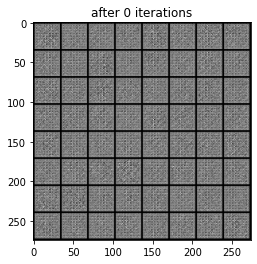

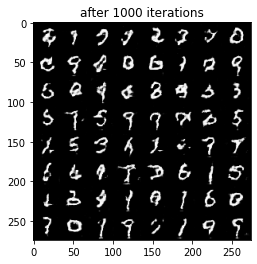

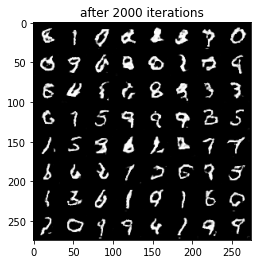

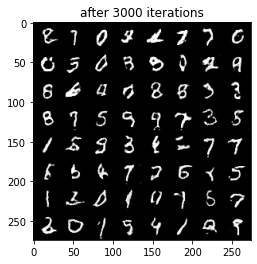

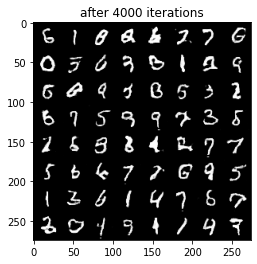

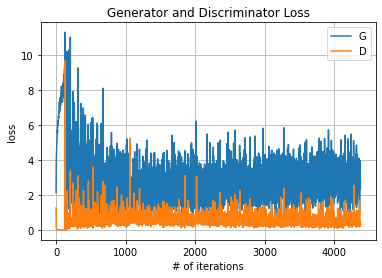

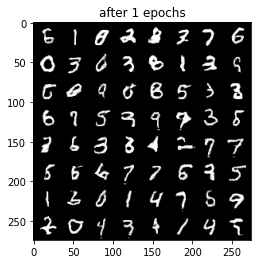

In [33]:
# [Ref] DCGAN tutorial
# https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

import numpy
import pylab
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.utils as vutils
from sklearn.datasets import fetch_openml

# MNIST dataset
class MnistDataset(Dataset):
  def __init__(self, tf=None):
    self.mnist = fetch_openml('mnist_784', cache=False)
    self.mnist.data /= numpy.max(self.mnist.data)
    self.mnist.data = self.mnist.data.astype(numpy.float32)
    self.transforms = tf
  
  def __len__(self):
    return self.mnist.data.shape[0]

  def __getitem__(self, index):
    img = self.mnist.data[index, :].reshape((28, 28, 1))
    img = numpy.pad(img, ((2,2), (2,2), (0,0)), 'symmetric') # --> 32 x 32 x 1 

    if self.transforms is not None:
      img = self.transforms(img)
    
    return img

# Generator model
class Generator(nn.Module):
  def __init__(self, in_channels, out_channels, nf, ngpu):
    super(Generator, self).__init__()
    self.ngpu = ngpu
    self.main = nn.Sequential(
        # in_channels x 1 x 1
        nn.ConvTranspose2d(in_channels=in_channels, out_channels=nf*4, kernel_size=4, stride=1, padding=0, bias=False),
        nn.BatchNorm2d(nf*4),
        nn.ReLU(inplace=True),
        # nf*8 x 4 x 4
        nn.ConvTranspose2d(in_channels=nf*4, out_channels=nf*2, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(nf*2),
        nn.ReLU(inplace=True),
        # nf*4 x 8 x 8
        nn.ConvTranspose2d(in_channels=nf*2, out_channels=nf, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(nf),
        nn.ReLU(inplace=True),
        # nf*2 x 16 x 16
        nn.ConvTranspose2d(in_channels=nf, out_channels=out_channels, kernel_size=4, stride=2, padding=1, bias=False),
        nn.Sigmoid(),
        # out_channels x 32 x 32
    )

  def forward(self, x):
    return self.main(x)

# Discriminator model
class Discriminator(nn.Module):
  def __init__(self, in_channels, nf, ngpu):
    super(Discriminator, self).__init__()
    self.ngpu = ngpu
    self.main = nn.Sequential(
        # in_channels x 32 x 32
        nn.Conv2d(in_channels=in_channels, out_channels=nf, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(nf),
        nn.ReLU(inplace=True),
        # nf x 16 x 16
        nn.Conv2d(in_channels=nf, out_channels=nf*2, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(nf*2),
        nn.ReLU(inplace=True),
        # nf*2 x 8 x 8
        nn.Conv2d(in_channels=nf*2, out_channels=nf*4, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(nf*4),
        nn.ReLU(inplace=True),
        # nf*4 x 4 x 4
        nn.Conv2d(in_channels=nf*4, out_channels=1, kernel_size=4, stride=1, padding=0, bias=False),
        nn.Sigmoid(),
        # 1 x 1 x 1
    )

  def forward(self, x):
    return self.main(x)

# model weight initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# training
def train(modelD, modelG, optimizerD, optimizerG, in_channels_G, criterion, dataloader, real_label, fake_label, device, fixed_noise=None):
  G_losses = []
  D_losses = []
  for i, data in enumerate(dataloader, 0):
    modelD.train()
    modelG.train()
    # 1. train the discriminator with real samples
    modelD.zero_grad()
    x_real = data.to(device)
    b_size = x_real.shape[0]
    label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
    output = modelD(x_real).view(-1)
    errD_real = criterion(output, label)
    errD_real.backward()

    # 2. train the discriminator with fake samples
    noise = torch.randn(b_size, in_channels_G, 1, 1, device=device)
    x_fake = modelG(noise)
    label.fill_(fake_label)
    output = modelD(x_fake).view(-1)
    errD_fake = criterion(output, label)
    errD_fake.backward()
    optimizerD.step()

    # 3. train the generator
    modelG.zero_grad()
    modelD.zero_grad()
    label.fill_(real_label) # we want the discriminator to output 1.
    x_fake = modelG(noise)
    output = modelD(x_fake).view(-1)
    errG = criterion(output, label)
    errG.backward()
    optimizerG.step()

    # losses
    errD = errD_real + errD_fake
    D_losses.append(errD.item())
    G_losses.append(errG.item())

    # interim visual evaluation
    if fixed_noise is not None and i % 1000 == 0:
      modelG.eval()
      x_new = modelG(fixed_noise).detach().cpu()
      pylab.imshow(numpy.transpose(vutils.make_grid(x_new, padding=2, normalize=True),(1,2,0)))
      pylab.title('after %d iterations' % (i))
      pylab.show()

  return G_losses, D_losses

def main():
  # parameters
  ngpu = 1                # number of GPUs
  batch_size = 16         # training batch size
  num_workers = 2         # the number of workers for the data loader
  in_channels_G = 32      # the size of the noise vector z
  out_channels_G = 1      # the channel size of the output image by the generator (1 because the image is grayscale)
  num_features_G = 16     # the number of features of the generator
  in_channels_D = 1       # the channel size of the input image  to the discriminator
  num_features_D = 16     # the number of features of the discriminator
  learning_rate = 0.001   # the learning rate of the optimizer
  beta1 = 0.5             # a parameter of the Adam optimizer
  num_epochs = 1          # the number of epochs for training
  real_label = 1.         # the label value for the real samples
  fake_label = 0.         # the label value for the fake samples

  # choose the device
  if torch.cuda.is_available() and ngpu > 0:
    device = torch.device("cuda:0")
  else:
    device = torch.device("cpu")

  # data transformer for training
  train_transforms = transforms.Compose([
      transforms.ToTensor(),
  ])
  
  # dataset for training (MNIST dataset)
  train_dataset = MnistDataset(tf=train_transforms)

  # data loader for training
  train_dataloader = DataLoader(dataset=train_dataset,
                                batch_size=batch_size,
                                shuffle=True,
                                num_workers=num_workers)

  # Generator model
  modelG = Generator(in_channels=in_channels_G, out_channels=out_channels_G, nf=num_features_G, ngpu=ngpu)

  # Discriminator model
  modelD = Discriminator(in_channels=in_channels_D, nf=num_features_D, ngpu=ngpu)

  # model initialization
  modelG.apply(weights_init)
  modelD.apply(weights_init)

  # send the models to the device
  modelG.to(device)
  modelD.to(device)

  # minimize the binary cross entropy
  # (equivalent to maximizie the log likelihood)
  criterion = nn.BCELoss()

  # optimizers for the discriminator and generator models
  optimizerD = torch.optim.Adam(modelD.parameters(), lr=learning_rate, betas=(beta1, 0.999))
  optimizerG = torch.optim.Adam(modelG.parameters(), lr=learning_rate, betas=(beta1, 0.999))

  # a fized noise set for visualization
  fixed_noise = torch.randn(64, in_channels_G, 1, 1, device=device)

  # training loop
  G_losses = []
  D_losses = []
  for _ in range(num_epochs):
    G_loss, D_loss = train(modelD, modelG, optimizerD, optimizerG, 
                           in_channels_G, criterion, train_dataloader, 
                           real_label, fake_label, device, fixed_noise)
    G_losses += G_loss
    D_losses += D_loss

  # plot loss curves
  pylab.plot(G_losses, label='G')
  pylab.plot(D_losses, label='D')
  pylab.title('Generator and Discriminator Loss')
  pylab.legend()
  pylab.grid()
  pylab.xlabel('# of iterations')
  pylab.ylabel('loss')
  pylab.show()

  # visual evaluation
  modelG.eval()
  x_new = modelG(fixed_noise).detach().cpu()
  pylab.imshow(numpy.transpose(vutils.make_grid(x_new, padding=2, normalize=True),(1,2,0)))
  pylab.title('after %d epochs' % (num_epochs))
  pylab.show()
    

if __name__ == '__main__':
  main()

